## Pubg
### Bongsang Kim

In [14]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Data Setup

In [2]:
img_width, img_height = 224, 224
train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = 2000
nb_validation_samples = 800
data_channel_first = True

In [3]:
if K.image_data_format() == data_channel_first:
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

### Hyperparameters

In [4]:
kernel = (3, 3)
stride = (1, 1)
pool = (3, 3)

epochs = 100
batch_size = 16

### Convolution Networks

In [5]:
model = Sequential()
model.add(Conv2D(32, kernel_size=kernel, strides=stride, input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool))

model.add(Conv2D(32, kernel_size=kernel, strides=stride))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool))

model.add(Conv2D(64, kernel_size=kernel, strides=stride, name='3rd_conv_layer'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# this is the augmentation configuration we will use for train
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for validation:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

model.save_weights('pubg_model.h5')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/100
125/125 [==============================] - 16s 128ms/step - loss: 0.6930 - acc: 0.5265 - val_loss: 0.6693 - val_acc: 0.6325
Epoch 2/100
125/125 [==============================] - 15s 117ms/step - loss: 0.6644 - acc: 0.6045 - val_loss: 0.6232 - val_acc: 0.6625
Epoch 3/100
125/125 [==============================] - 14s 115ms/step - loss: 0.6348 - acc: 0.6545 - val_loss: 0.6037 - val_acc: 0.7113
Epoch 4/100
125/125 [==============================] - 14s 116ms/step - loss: 0.6117 - acc: 0.6725 - val_loss: 0.6119 - val_acc: 0.6675
Epoch 5/100
125/125 [==============================] - 14s 116ms/step - loss: 0.6106 - acc: 0.6650 - val_loss: 0.5685 - val_acc: 0.6825
Epoch 6/100
125/125 [==============================] - 14s 114ms/step - loss: 0.5851 - acc: 0.6995 - val_loss: 0.5919 - val_acc: 0.6737
Epoch 7/100
125/125 [==============================] - 14s 115ms/step - loss: 0.5806 - acc: 0.6965 -

125/125 [==============================] - 14s 115ms/step - loss: 0.3993 - acc: 0.8370 - val_loss: 0.3405 - val_acc: 0.8600
Epoch 61/100
125/125 [==============================] - 14s 112ms/step - loss: 0.3858 - acc: 0.8435 - val_loss: 0.3332 - val_acc: 0.8738
Epoch 62/100
125/125 [==============================] - 14s 114ms/step - loss: 0.3865 - acc: 0.8315 - val_loss: 0.3791 - val_acc: 0.8350
Epoch 63/100
125/125 [==============================] - 14s 115ms/step - loss: 0.3768 - acc: 0.8405 - val_loss: 0.4092 - val_acc: 0.8500
Epoch 64/100
125/125 [==============================] - 14s 114ms/step - loss: 0.3762 - acc: 0.8460 - val_loss: 0.3569 - val_acc: 0.8500
Epoch 65/100
125/125 [==============================] - 14s 115ms/step - loss: 0.3816 - acc: 0.8390 - val_loss: 0.3480 - val_acc: 0.8538
Epoch 66/100
125/125 [==============================] - 15s 116ms/step - loss: 0.3754 - acc: 0.8395 - val_loss: 0.4227 - val_acc: 0.8075
Epoch 67/100
125/125 [==============================] 

### Train history

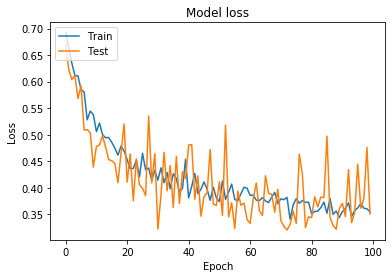

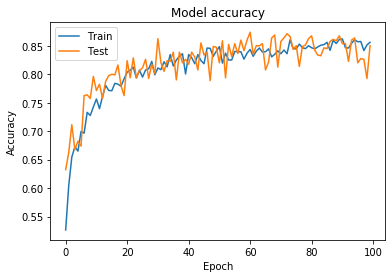

In [6]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Gradient

In [8]:
images = ['data/input/1.jpg',
          'data/input/2.jpg',
          'data/input/3.jpg']

In [15]:
load_model = model.load_weights('./pubg_model.h5')

for idx, image in enumerate(images):
    input_img = np.load(image)

    layer_dict = dict([(layer.name, layer) for layer in load_model.layers])

    layer_name = '3rd_conv_layer'
    filter_index = 0

    layer_output = layer_dict[layer_name].output
    loss = K.mean(layer_output[:, :, :, filter_index])

    grads = K.gradients(loss, input_img)[0]

    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

    out_file = open('data/input/' + idx + '_outtext.txt','w')
    gradient_file = open('data/input/' + idx + '_gradient.txt', 'w')
    
    out_file.write(loss)
    gradient_file.write(grads)
    
    out_file.close()
    gradient_file.close()

ValueError: Cannot load file containing pickled data when allow_pickle=False

### Thanks!
### Bongsang